Davies-Bouldin Index: 0.8595340221510472


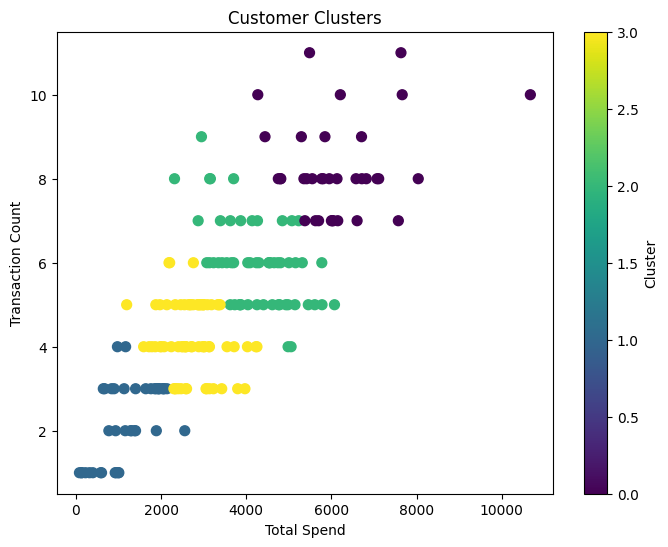

Clustering Report:
Number of Clusters: 4
Davies-Bouldin Index: 0.8595340221510472
Results saved to Customer_Clusters.csv


In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


customers = pd.read_csv('/content/Customers.csv')
transactions = pd.read_csv('/content/Transactions.csv')


data = transactions.merge(customers, on='CustomerID', how='left')


customer_summary = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count'
}).rename(columns={
    'TotalValue': 'TotalSpend',
    'TransactionID': 'TransactionCount'
}).reset_index()


customer_summary.fillna(0, inplace=True)


scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_summary[['TotalSpend', 'TransactionCount']])


num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_summary['Cluster'] = kmeans.fit_predict(scaled_features)


db_index = davies_bouldin_score(scaled_features, customer_summary['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")


plt.figure(figsize=(8, 6))
plt.scatter(
    customer_summary['TotalSpend'],
    customer_summary['TransactionCount'],
    c=customer_summary['Cluster'],
    cmap='viridis',
    s=50
)
plt.xlabel('Total Spend')
plt.ylabel('Transaction Count')
plt.title('Customer Clusters')
plt.colorbar(label='Cluster')
plt.show()


customer_summary.to_csv('Customer_Clusters.csv', index=False)


print("Clustering Report:")
print(f"Number of Clusters: {num_clusters}")
print(f"Davies-Bouldin Index: {db_index}")
print("Results saved to Customer_Clusters.csv")
